In [8]:
import numpy as np                               
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt                  # plots
import seaborn as sns                            # plots
from sklearn.metrics import mean_absolute_error
import warnings                                  
warnings.filterwarnings('ignore')
%matplotlib inline

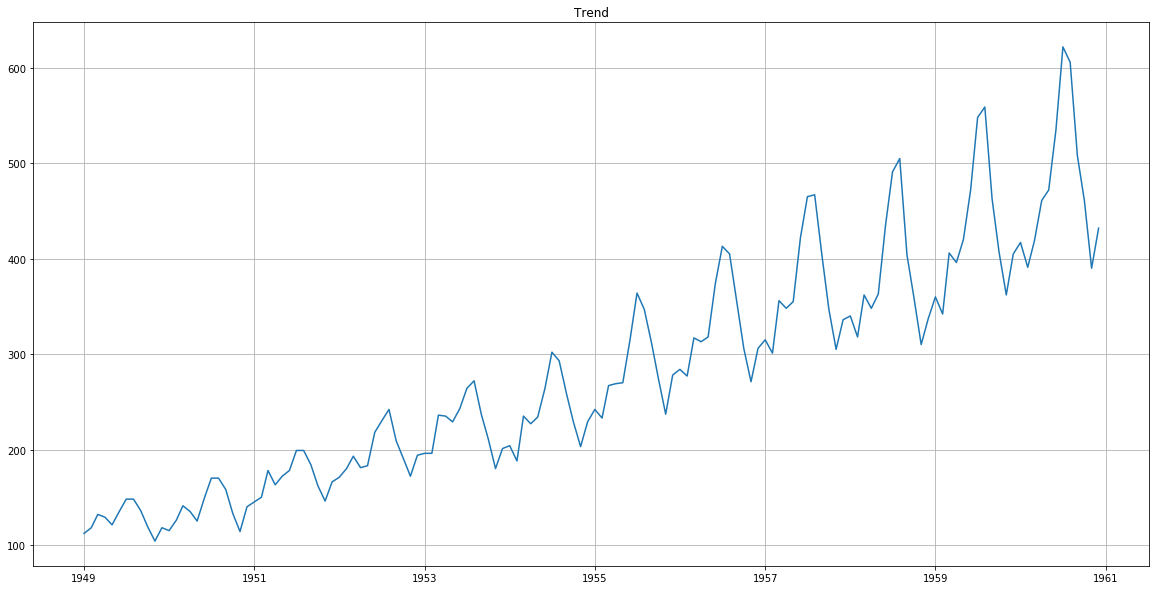

In [15]:
data = pd.read_csv('AirPassengers.csv', index_col=['Month'], parse_dates=['Month'])
plt.figure(figsize=(20, 10))
plt.plot(ads)
plt.title('Trend')
plt.grid(True)
plt.show()



In [12]:
def plotMovingAverage(series, window, plot_intervals=False, scale=1.96, plot_anomalies=False):
    rolling_mean = series.rolling(window=window).mean()
    plt.figure(figsize=(15,5))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")
    # Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
        plt.plot(lower_bond, "r--")       
        # Having the intervals, find abnormal values
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series<lower_bond] = series[series<lower_bond]
            anomalies[series>upper_bond] = series[series>upper_bond]
            plt.plot(anomalies, "ro", markersize=10)        
    plt.plot(series[window:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)

In [13]:
data_anomaly = data.copy()
data_anomaly.iloc[-20] = data_anomaly.iloc[-20] * 0.2 # say we have 80% drop of ads

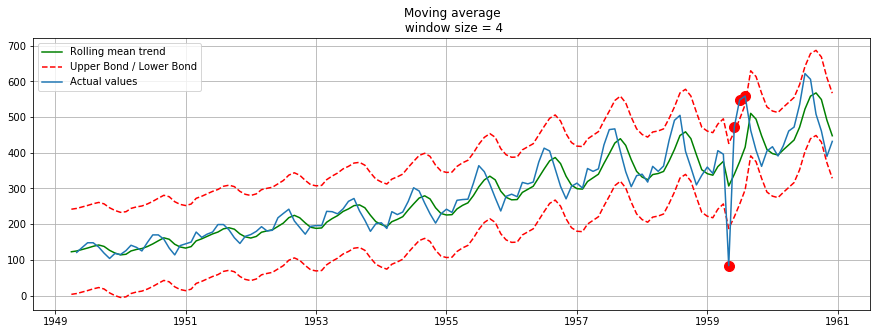

In [14]:
plotMovingAverage(data_anomaly, 4, plot_intervals=True, plot_anomalies=True)